In [1]:
import pandas


train_val = pandas.read_csv("../data/vn30/GAS_train.csv")
# table["Date"] = pandas.to_datetime(table["Date"])
train_val

,time,open,high,low,close,volume
0,2020-01-02,61.69,62.68,61.69,62.28,141260
1,2020-01-03,62.28,63.47,62.28,62.42,218980
2,2020-01-06,63.67,64.52,63.34,64.39,431090
3,2020-01-07,64.32,64.32,63.40,63.93,142800
4,2020-01-08,64.92,65.18,63.86,63.86,439260
...,...,...,...,...,...,...
995,2023-12-25,67.98,69.80,67.98,69.61,1057401
996,2023-12-26,69.80,69.80,68.89,69.52,756305
997,2023-12-27,69.52,69.80,69.25,69.43,707087
998,2023-12-28,69.52,69.52,68.80,69.16,767974


In [2]:
train_val.drop("time", axis=1, inplace=True)

In [3]:
from typing import List, Tuple


CONTEXT_SIZE = 4


def extract_xy(table: pandas.DataFrame, *, context_size: int) -> Tuple[pandas.DataFrame, pandas.DataFrame]:
    series: List[pandas.Series] = []
    original = table.columns
    output_names: List[str] = []

    for column in table.columns:
        for shift in range(1, context_size + 1):
            s = table[column].shift(shift)
            s.name = f"{column}-{shift}"

            series.append(s)
            output_names.append(s.name)

    table = pandas.concat([table, *series], axis=1)
    table.dropna(inplace=True)

    return table[output_names], table[original]


train_val_input, train_val_output = extract_xy(train_val, context_size=CONTEXT_SIZE)
train_val_input.shape, train_val_output.shape

((996, 20), (996, 5))

In [4]:
train_val_input

,open-1,open-2,open-3,open-4,high-1,high-2,high-3,high-4,low-1,low-2,low-3,low-4,close-1,close-2,close-3,close-4,volume-1,volume-2,volume-3,volume-4
4,64.32,63.67,62.28,61.69,64.32,64.52,63.47,62.68,63.40,63.34,62.28,61.69,63.93,64.39,62.42,62.28,142800.0,431090.0,218980.0,141260.0
5,64.92,64.32,63.67,62.28,65.18,64.32,64.52,63.47,63.86,63.40,63.34,62.28,63.86,63.93,64.39,62.42,439260.0,142800.0,431090.0,218980.0
6,63.21,64.92,64.32,63.67,63.73,65.18,64.32,64.52,62.42,63.86,63.40,63.34,62.68,63.86,63.93,64.39,320980.0,439260.0,142800.0,431090.0
7,62.88,63.21,64.92,64.32,63.21,63.73,65.18,64.32,62.55,62.42,63.86,63.40,63.14,62.68,63.86,63.93,160820.0,320980.0,439260.0,142800.0
8,63.14,62.88,63.21,64.92,63.14,63.21,63.73,65.18,62.35,62.55,62.42,63.86,62.74,63.14,62.68,63.86,355190.0,160820.0,320980.0,439260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,68.16,68.25,68.70,68.25,68.43,68.34,68.70,68.61,67.61,67.70,68.07,67.52,67.98,67.98,68.43,68.25,617722.0,728928.0,574287.0,887468.0
996,67.98,68.16,68.25,68.70,69.80,68.43,68.34,68.70,67.98,67.61,67.70,68.07,69.61,67.98,67.98,68.43,1057401.0,617722.0,728928.0,574287.0
997,69.80,67.98,68.16,68.25,69.80,69.80,68.43,68.34,68.89,67.98,67.61,67.70,69.52,69.61,67.98,67.98,756305.0,1057401.0,617722.0,728928.0
998,69.52,69.80,67.98,68.16,69.80,69.80,69.80,68.43,69.25,68.89,67.98,67.61,69.43,69.52,69.61,67.98,707087.0,756305.0,1057401.0,617722.0


In [5]:
train_val_output

,open,high,low,close,volume
4,64.92,65.18,63.86,63.86,439260
5,63.21,63.73,62.42,62.68,320980
6,62.88,63.21,62.55,63.14,160820
7,63.14,63.14,62.35,62.74,355190
8,62.68,63.21,62.48,62.48,166850
...,...,...,...,...,...
995,67.98,69.80,67.98,69.61,1057401
996,69.80,69.80,68.89,69.52,756305
997,69.52,69.80,69.25,69.43,707087
998,69.52,69.52,68.80,69.16,767974


In [6]:
from sklearn.model_selection import train_test_split


train_input, val_input, train_output, val_output = train_test_split(
    train_val_input,
    train_val_output,
    train_size=0.8,
    random_state=42,
    shuffle=True,
)
train_input.shape, val_input.shape, train_output.shape, val_output.shape

((796, 20), (200, 20), (796, 5), (200, 5))

In [7]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)
val_input_scaled = scaler.transform(val_input)

In [8]:
from typing import TypedDict

import numpy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_percentage_error,
    root_mean_squared_error,
    r2_score,
)


class Metrics(TypedDict):
    rmse: float
    mape: float
    r2: float


def metrics(true: pandas.DataFrame, pred: numpy.ndarray) -> Metrics:
    return {
        "rmse": root_mean_squared_error(true, pred),
        "mape": mean_absolute_percentage_error(true, pred),
        "r2": r2_score(true, pred),
    }


model = LinearRegression()
model.fit(train_input_scaled, train_output)
metrics(train_output, model.predict(train_input_scaled))

{'rmse': 74929.1595818528,
 'mape': 0.0898693289775126,
 'r2': 0.8960867731877737}

In [9]:
metrics(val_output, model.predict(val_input_scaled))

{'rmse': 86648.1489959099,
 'mape': 0.09557181788283162,
 'r2': 0.896216602878772}

In [10]:
rmse: List[float] = []
mape: List[float] = []
r2: List[float] = []

for context_size in range(1, 21):
    train_val_input, train_val_output = extract_xy(train_val, context_size=context_size)
    train_input, val_input, train_output, val_output = train_test_split(
        train_val_input,
        train_val_output,
        train_size=0.8,
        random_state=42,
        shuffle=True,
    )

    scaler = StandardScaler()
    train_input_scaled = scaler.fit_transform(train_input)
    val_input_scaled = scaler.transform(val_input)

    model = LinearRegression()
    model.fit(train_input_scaled, train_output)
    metrics(train_output, model.predict(train_input_scaled))

    m = metrics(val_output, model.predict(val_input_scaled))

    rmse.append(m["rmse"])
    mape.append(m["mape"])
    r2.append(m["r2"])


def sort_metrics(metrics: List[float], *, reverse: bool = False) -> List[float]:
    return sorted(enumerate(metrics, start=1), key=lambda x: x[1], reverse=reverse)


print(sort_metrics(rmse, reverse=False))
print(sort_metrics(mape, reverse=False))
print(sort_metrics(r2, reverse=True))

[(8, 70543.43757634985), (15, 70846.04712927305), (3, 75095.91369929239), (13, 78979.8563832754), (19, 79060.68952204115), (2, 79690.07983247939), (14, 80705.8612831709), (11, 82535.2838408), (18, 82775.1429758146), (6, 84068.26298201326), (17, 84821.38062505634), (10, 84983.25742705588), (16, 85071.32840011167), (20, 85147.56429396351), (5, 85650.98381071672), (7, 85666.10664606855), (4, 86648.1489959099), (12, 91794.55976106963), (9, 94183.42850114233), (1, 98002.66705723088)]
[(13, 0.08360127694591107), (11, 0.083632013207367), (14, 0.08583706320744429), (10, 0.08855953318624457), (8, 0.08858879559476418), (2, 0.09003541475434945), (5, 0.09003604606331514), (19, 0.0907047060590848), (6, 0.09381083630288523), (9, 0.09391954650594322), (12, 0.09424849843869612), (4, 0.09557181788283162), (3, 0.09633216810117892), (16, 0.09668737369725051), (17, 0.09799080601368607), (7, 0.09823558917422663), (15, 0.09842238424538528), (20, 0.10137433060786123), (1, 0.10531644816808536), (18, 0.1063784

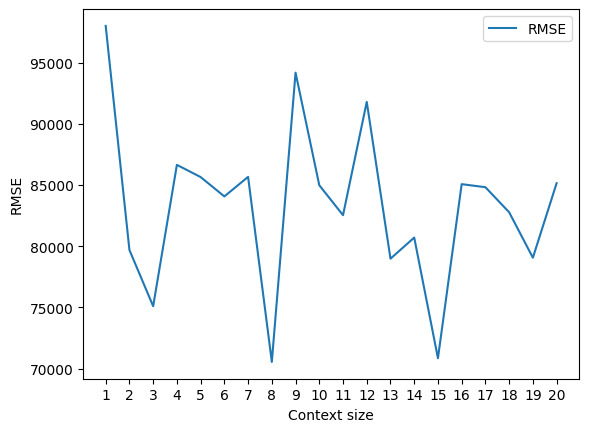

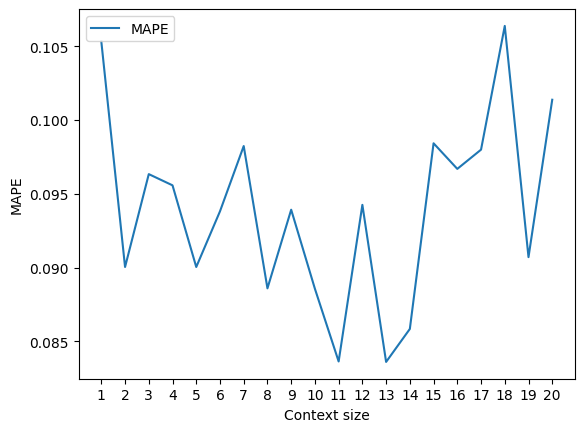

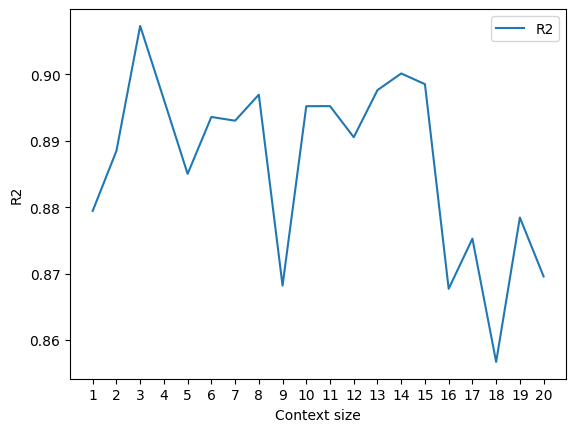

In [11]:
from matplotlib import axes, pyplot


def plot_metric(values: List[float], *, label: str) -> None:
    axes.Axes.set_xticks(pyplot.gca(), ticks=range(1, 21))
    pyplot.plot(range(1, 21), values, label=label)
    pyplot.xlabel("Context size")
    pyplot.ylabel(label)
    pyplot.legend()
    pyplot.show()


plot_metric(rmse, label="RMSE")
plot_metric(mape, label="MAPE")
plot_metric(r2, label="R2")

In [12]:
CONTEXT_SIZE = 8
train_val_input, train_val_output = extract_xy(train_val, context_size=CONTEXT_SIZE)
train_input, val_input, train_output, val_output = train_test_split(
    train_val_input,
    train_val_output,
    train_size=0.8,
    random_state=42,
    shuffle=True,
)

scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)
val_input_scaled = scaler.transform(val_input)

model = LinearRegression()
model.fit(train_input_scaled, train_output)
metrics(val_output, model.predict(val_input_scaled))

{'rmse': 70543.43757634985,
 'mape': 0.08858879559476418,
 'r2': 0.8969498065817035}

In [13]:
test = pandas.read_csv("../data/vn30/GAS_test.csv")
test.drop("time", axis=1, inplace=True)
test_input, test_output = extract_xy(test, context_size=CONTEXT_SIZE)

test_input_scaled = scaler.transform(test_input)
metrics(test_output, model.predict(test_input_scaled))

{'rmse': 107056.67496076757,
 'mape': 0.09463032442159353,
 'r2': 0.8400566805116615}